In [3]:

from sklearn.datasets import load_iris
%matplotlib inline
import matplotlib.pyplot as plt
iris = load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
import pandas as pd
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
main_df=df[['petal length (cm)','petal width (cm)']]


In [15]:
main_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [17]:
main_df['flower']=iris.target

In [18]:
main_df.head()

,petal length (cm),petal width (cm),flower_type,flower
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0


In [20]:
main_df.drop('flower',axis='columns')

,petal length (cm),petal width (cm),flower_type
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


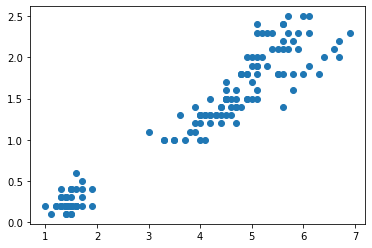

In [23]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [25]:
from sklearn.cluster import KMeans

In [27]:
k_means = KMeans(n_clusters=3)

In [29]:
y_predicted = k_means.fit_predict(main_df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
main_df['cluster']=y_predicted
main_df.head()

,petal length (cm),petal width (cm),flower_type,flower,cluster
0,1.4,0.2,0,0,1
1,1.4,0.2,0,0,1
2,1.3,0.2,0,0,1
3,1.5,0.2,0,0,1
4,1.4,0.2,0,0,1


In [31]:
k_means.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [33]:
df0=main_df[main_df.cluster==0]
df1=main_df[main_df.cluster==1]
df2=main_df[main_df.cluster==2]

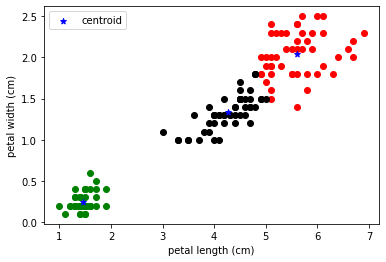

In [40]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='black')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],color='blue',marker='*',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [41]:
sse=[]
k_range=range(1,10)
for i in k_range:
    k_means=KMeans(n_clusters=i)
    k_means.fit(main_df[['petal length (cm)','petal width (cm)']])
    sse.append(k_means.inertia_)

Text(0, 0.5, 'sse')

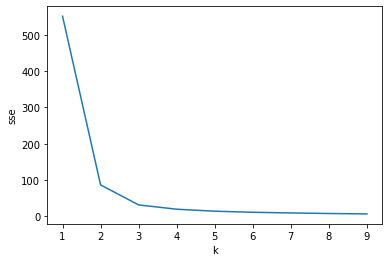

In [42]:
plt.plot(k_range,sse)
plt.xlabel('k')
plt.ylabel('sse')